In [ ]:
#1-Gerekli Kütüphaneler İçeri aktarıldı
#2-Veri seti yüklendi ve keşfedildi
#3-Veri önişleme yapıldı(Birleştirme)
#4-Keşifçi Veri Analizi
#5-Özellik Mühendisliği(gerekli durumlarda)
#6-Veri ayrımı yapıldı(Train ve validation setleri)
#7-Modelleme 
#8-Model değerlendirme
#9-Tahminleme
#10-Sunuş için tahmin hazırlama

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
train = pd.read_csv('/Users/yusuf/Desktop/deneme/kaggle/house-prices-advanced-regression-techniques/train.csv')

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df = pd.DataFrame(train)

In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
df.size

118260

In [19]:
df.ndim

2

In [20]:
df.shape

(1460, 81)

In [21]:
test = pd.read_csv('/Users/yusuf/Desktop/deneme/kaggle/house-prices-advanced-regression-techniques/test.csv')

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
combined_data = pd.concat([train.drop('SalePrice', axis = 1), test])

In [27]:
combined_data.fillna(combined_data.mean(), inplace=True)

/var/folders/1k/1yr5467140s8gbdnmgqbj8rh0000gn/T/ipykernel_19859/3924144531.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_data.fillna(combined_data.mean(), inplace=True)


In [30]:
le = LabelEncoder()
for feature in combined_data.select_dtypes(include='object'):
    combined_data[feature] = le.fit_transform(combined_data[feature].astype(str))

In [31]:
X_train = combined_data[:train.shape[0]]
X_test = combined_data[train.shape[0]:]
y_train = train['SalePrice']

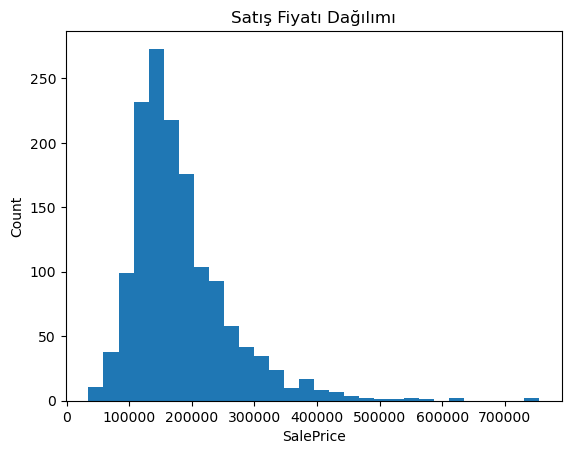

In [32]:
plt.hist(y_train, bins=30)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Satış Fiyatı Dağılımı')
plt.show()

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

print('Train RMSE:', train_rmse)
print('Validation:', val_rmse)

Train RMSE: 29478.529739378566
Validation: 34658.00926573328


In [38]:
test_pred = model.predict(X_test) 

In [39]:
print(test_pred)

[105000.2647295  156627.00597818 163395.53943897 ... 136893.814824
 112319.78772887 240970.47770711]


In [40]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)